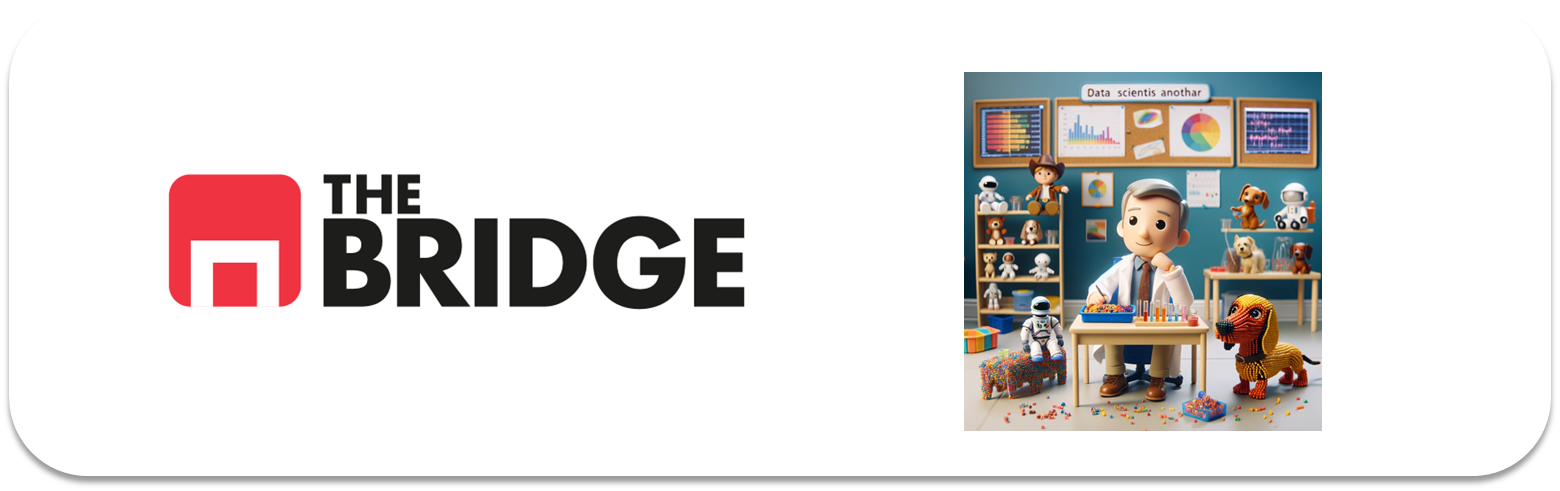

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [67]:
sns.get_dataset_names() #Nombres de los datasets de seaborn.
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [68]:
print(df_titanic.info())
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [69]:
df_titanic = df_titanic.drop("parch", axis = 1)

In [70]:
for columna in df_titanic.columns:
    porcentaje_nulos = df_titanic[columna].isnull().sum() / len(df_titanic) * 100
    if porcentaje_nulos > 0:
        print(f"Porcentaje de nulos '{columna}': {porcentaje_nulos: .2f}% ({df_titanic[columna].isnull().sum()})")

Porcentaje de nulos 'age':  19.87% (177)
Porcentaje de nulos 'embarked':  0.22% (2)
Porcentaje de nulos 'deck':  77.22% (688)
Porcentaje de nulos 'embark_town':  0.22% (2)


In [71]:
# Columna "age": Reemplazar los nulos por la edad media.
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())

# Columna "deck": Eliminada por el alto porcentaje de nulos.
df_titanic.drop("deck", axis = 1, inplace = True)

# Columna "embarked": Sustituir nulos por la moda.
df_titanic["embarked"] = df_titanic["embarked"].fillna(df_titanic["embarked"].mode()[0])

# Columna "embarked_town": Sustituir nulos por la moda.
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0])

In [72]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survided|Si la persona sobrevivió o no|
|pclass|Clase del camarote / asiento|
|sex|Sexo del pasajero|
|Age|Edad del pasajero|
|sibsp|Número de familiares que viajan con la persona indicada en el manifiesto|
|fare|Precio del pasaje|
|embarked|Letra inicial del lugar en el que embarcó el pasajero|
|class|Clase del camarote/asiento. Lo mismo que "pclass"|
|who|Tipo de persona (mujer, hombre, niño)|
|adut_male|Si es un hombre o no|
|embark_town|Lugar en el que embarcó el pasajero. Lo mismo que que "embarked"|
|alive|Si la persona se mantuvo con vida. Lo mismo que "survived"|
|alone|Si la persona tenía familiares|


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [73]:
df_titanic.loc[df_titanic["embarked"] == "S", "embarked"] = "Southampton"
df_titanic.loc[df_titanic["embarked"] == "Q", "embarked"] = "Queenstown"
df_titanic.loc[df_titanic["embarked"] == "C", "embarked"] = "Cherburgo"

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [74]:
def card_tipo(df, umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique() / len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})

    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    df_temp["Tipo sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "Tipo sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "Tipo sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "Tipo sugerido"] = "Numerica continua"
    return df_temp

In [75]:
card_tipo(df_titanic)

,Card,%_Card,Tipo,Tipo sugerido
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


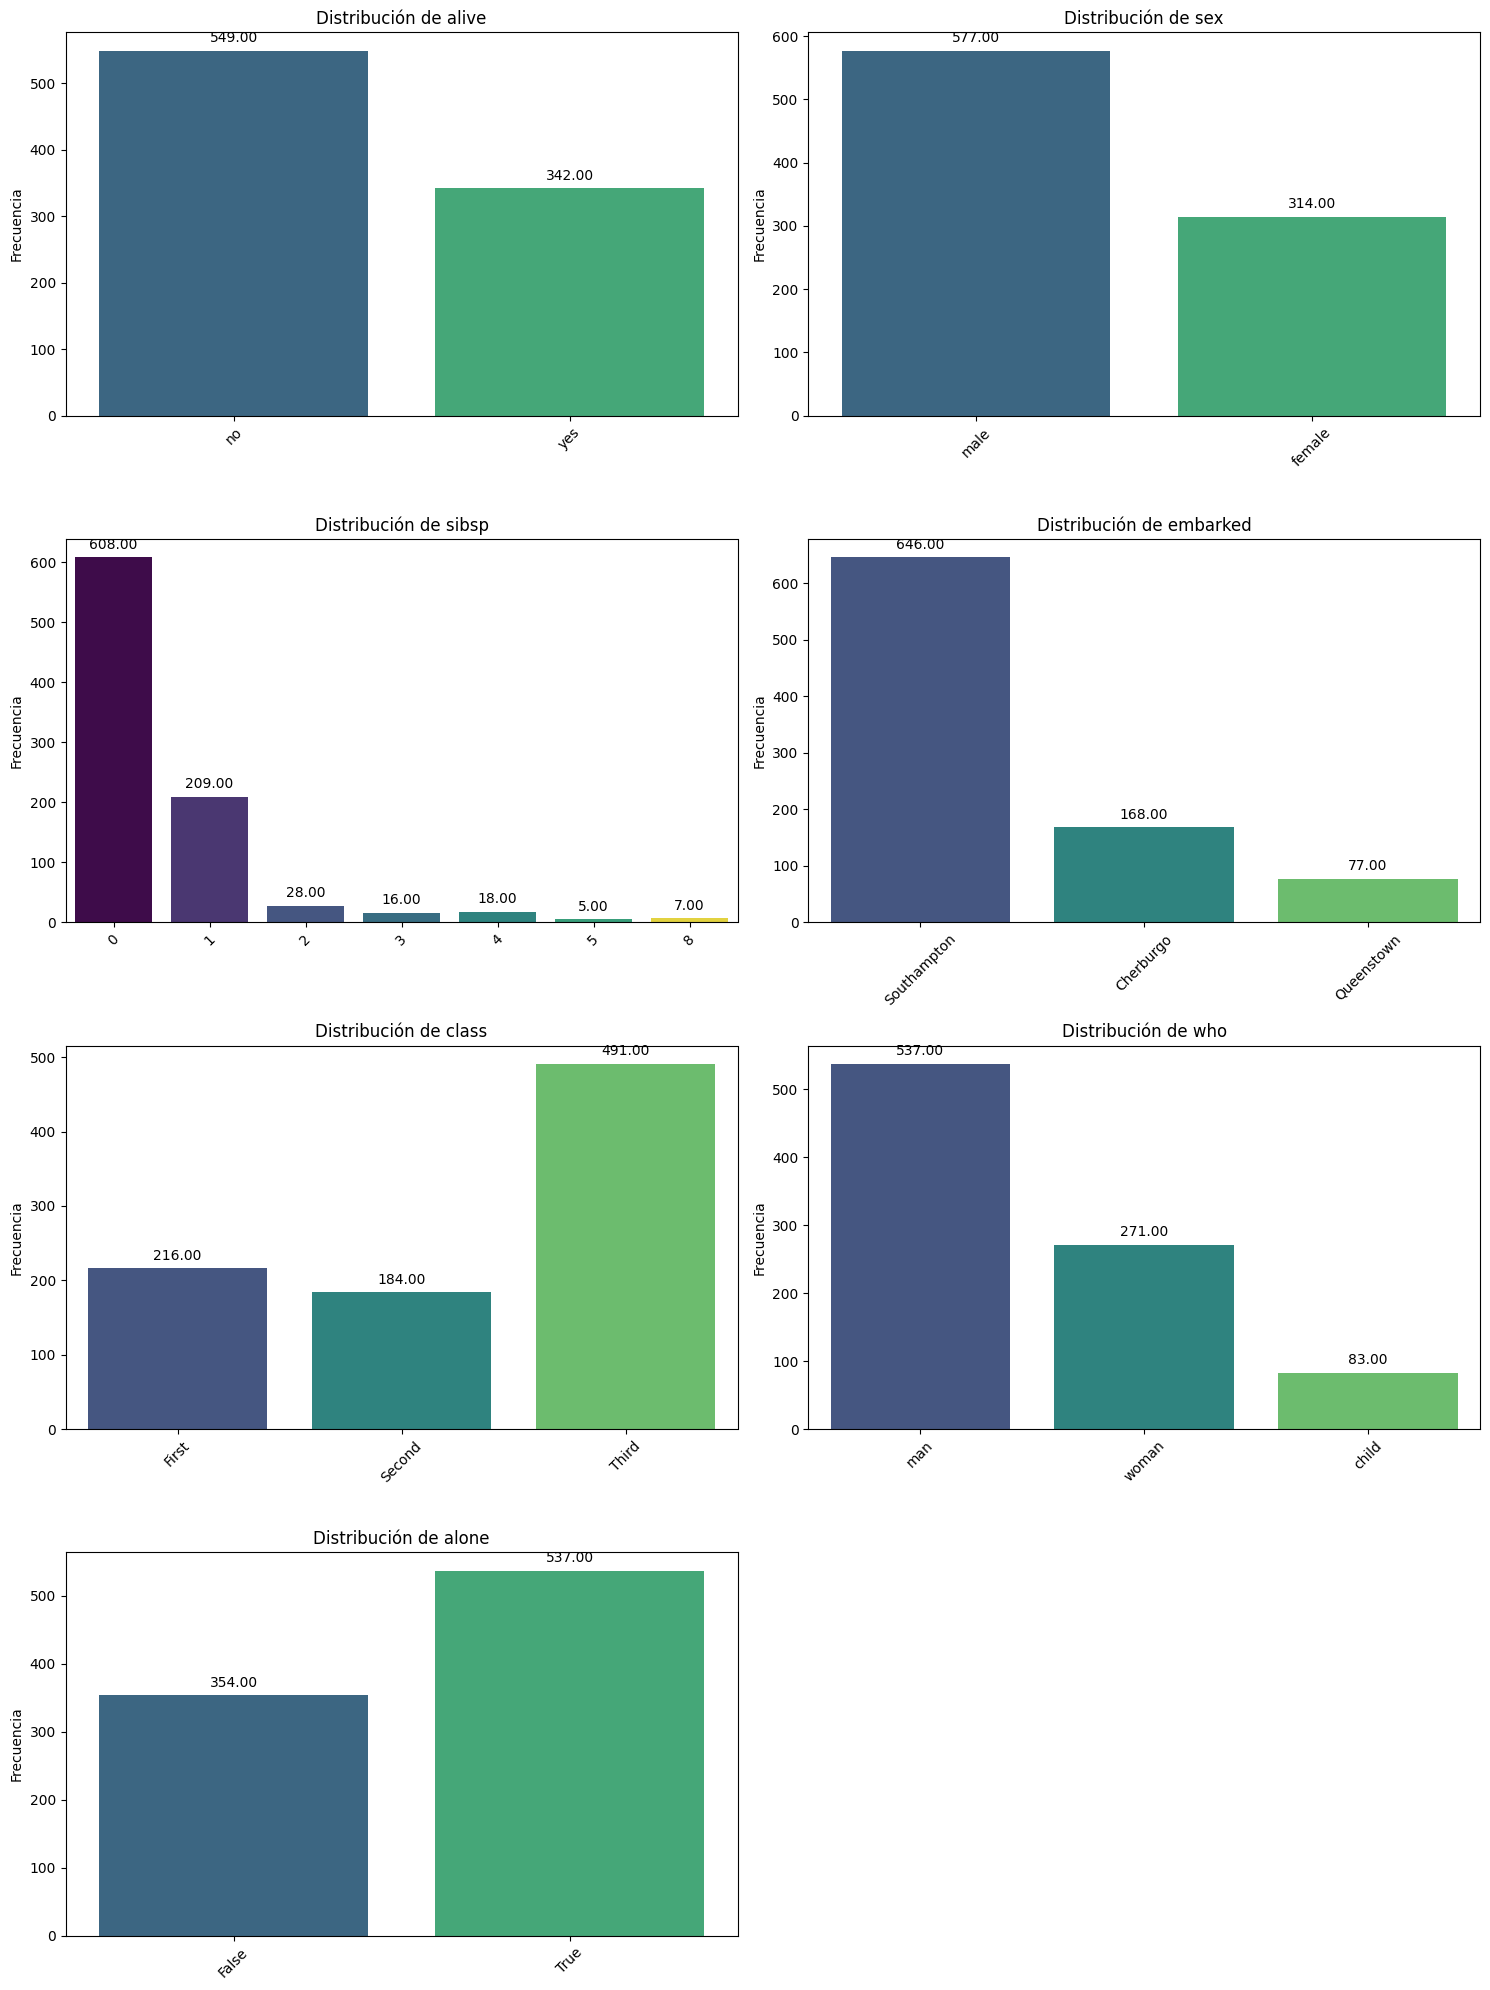

In [76]:
categoricas_titanic = [
    "alive",
    "sex",
    "sibsp",
    "embarked",
    "class",
    "who",
    "alone"
]

pinta_distribucion_categoricas(df_titanic, categoricas_titanic, mostrar_valores=True)

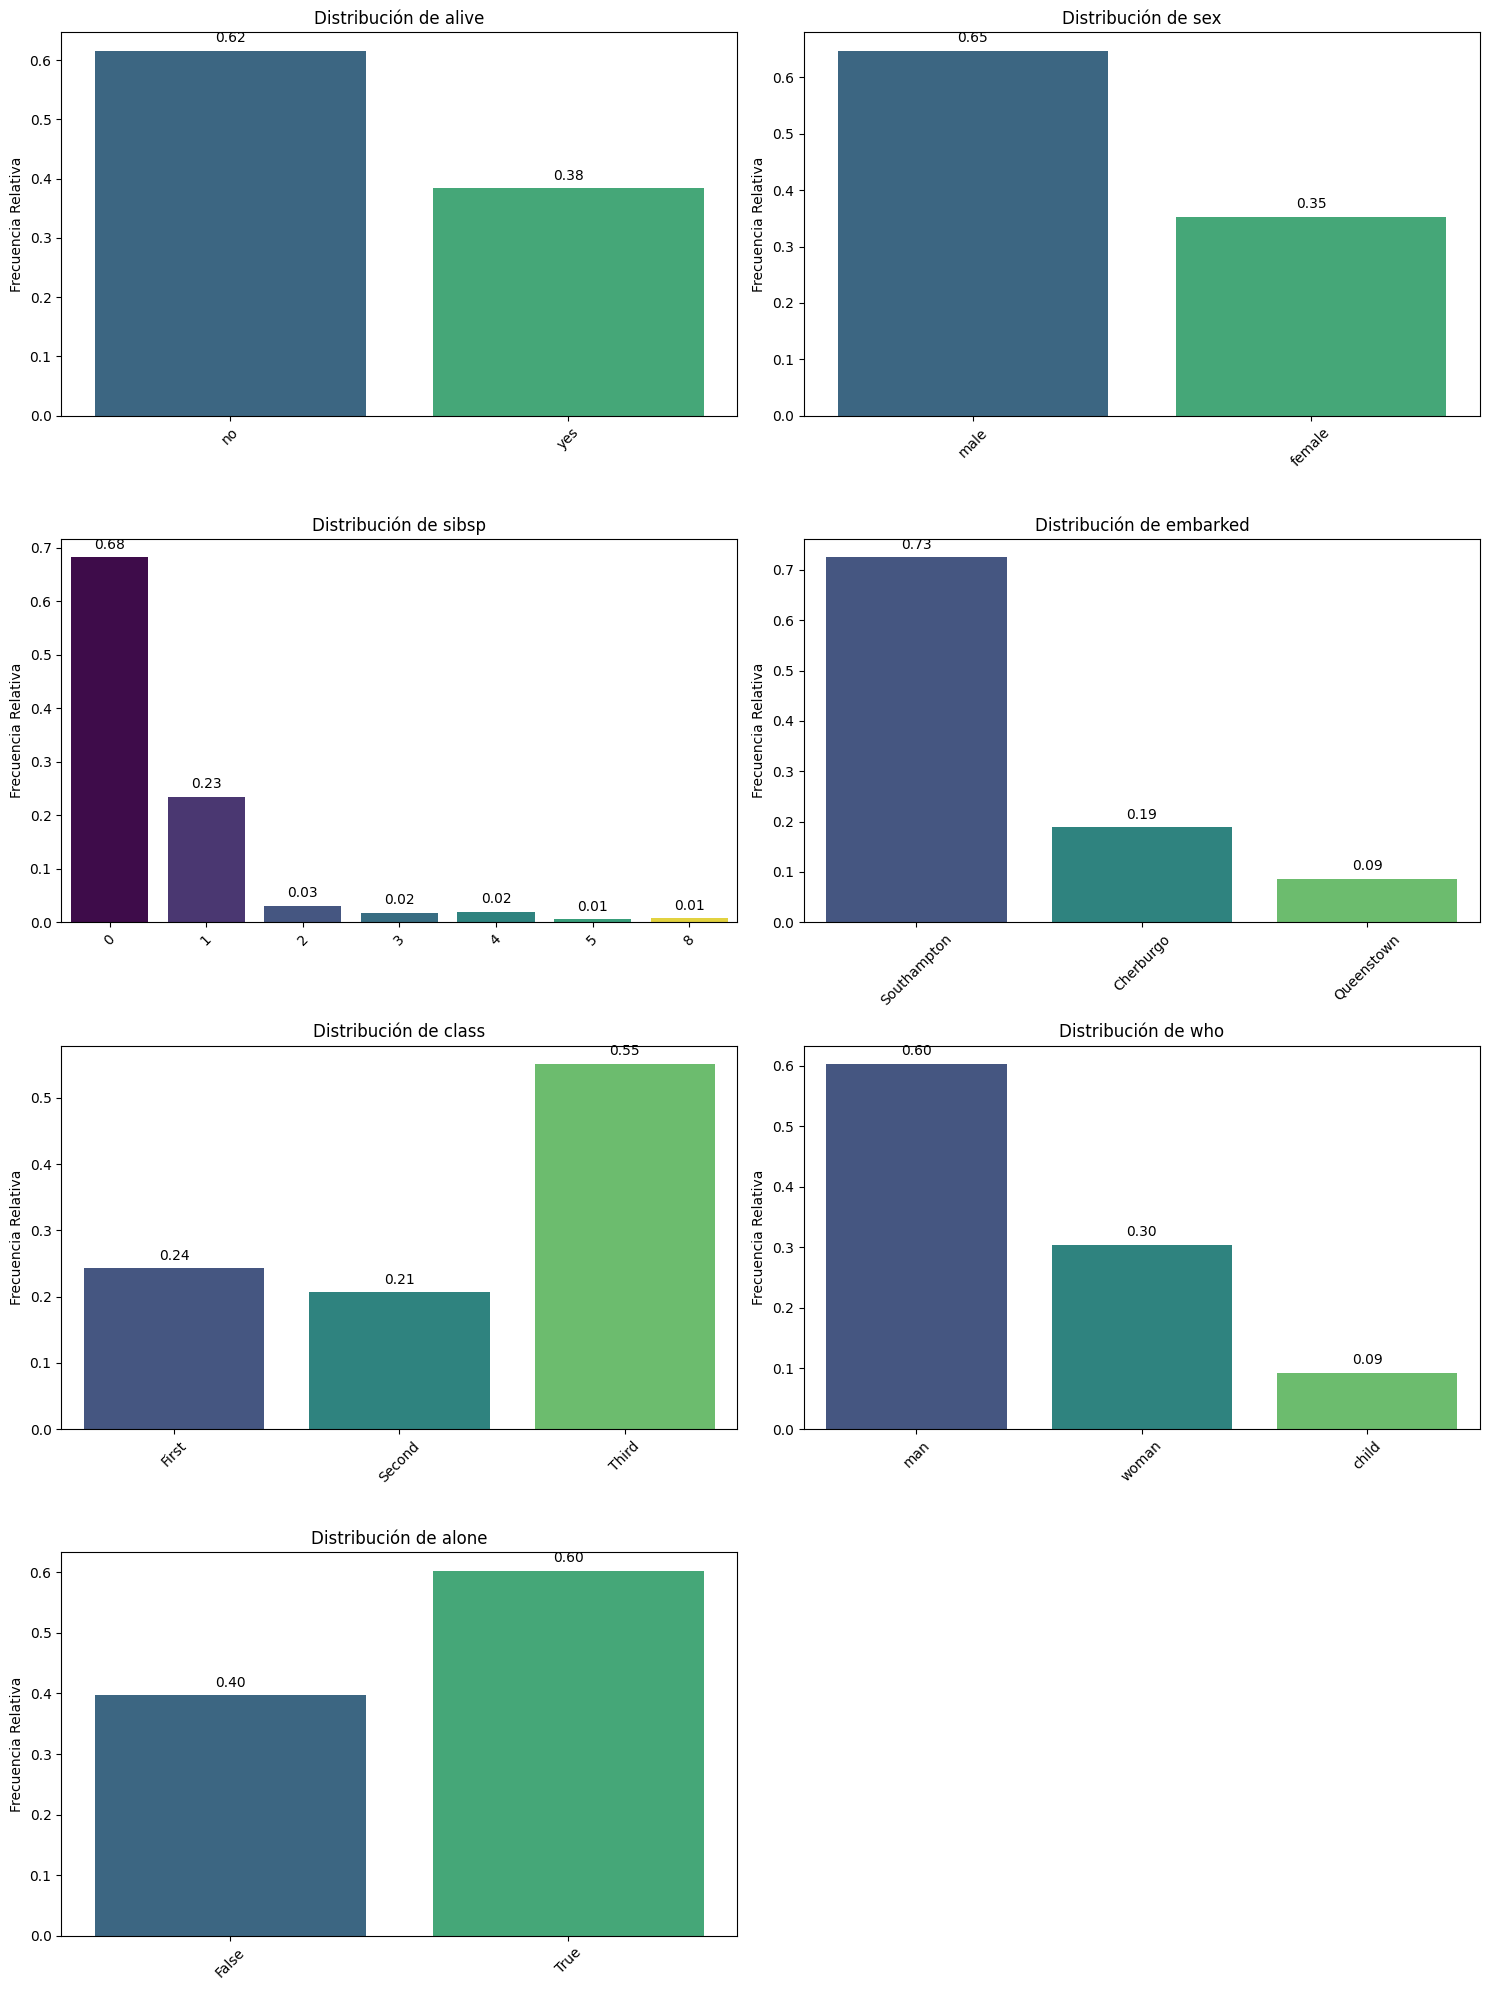

In [77]:
pinta_distribucion_categoricas(df_titanic, categoricas_titanic, relativa=True, mostrar_valores=True )

La distribución de "sex" muestra que había una mayor cantidad de hombres que de mujeres, esto podría estar relacionado con la cantidad de personas que consiguieron sobrevivir, reflejado en la variable "alive". La clase que más se repite en la variable "class " es la tercera, sin embargo la primera clase es superior en un 3% superior a la seguna clase. La distribución de la variable "alone" muestra que un 60% de los pasajeros no estaban acompañados, esta variable también puede relacionarse con la variable "alive" para saber como influyó mediante un análisis bivariante. En cuanto a la variable "who" se observa que la mayoría de los pasajeros fueron hombres, mientras que los niños fueron un total del 9% de los pasajeros totales.

### #2.2 Numéricas

In [85]:
numericas_titanic = ["age", "fare"]
df_titanic[["age","fare"]].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


# Cálculo IQR (índice intercuartilico)
IQR = 35 - 22 = 13
3 * IQR = 39
maximum = P75 + lw = 35 + 39 = 74
minimun = min(P25 - lw, min) = 22 -39 = -17 -> 0.42

In [82]:
# Función CV:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"] / df[columna].describe().T["mean"] * 100

In [84]:
print(get_CV(df_titanic, "age"))
print(get_CV(df_titanic, "fare"))

age    43.77913
dtype: float64
fare    154.307253
dtype: float64


(2, 2)


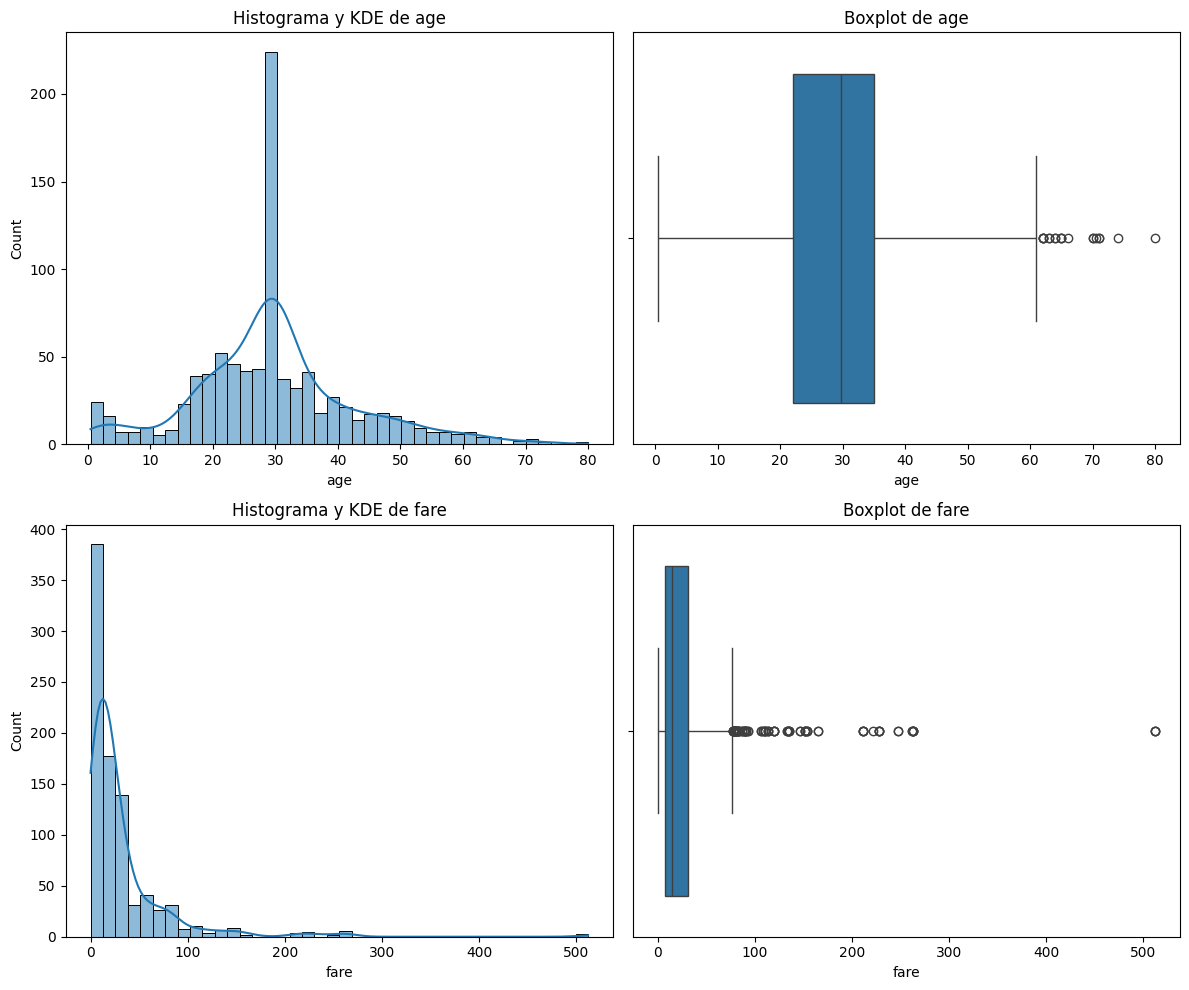

In [86]:
plot_combined_graphs(df_titanic, numericas_titanic, whisker_width=2, bins = 40)